## Panel tips

In [31]:
import panel as pn
import pandas as pd
from sklearn.datasets import load_boston
from matplotlib.figure import Figure
from matplotlib.backends.backend_agg import FigureCanvas
import matplotlib.pyplot as plt
data = load_boston()
df = pd.DataFrame(data.data, columns=data.feature_names)


In [32]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [34]:
## 選択フォームを追加
select1 = pn.widgets.Select(name='Feature1', options=list(df.columns))
select2 = pn.widgets.Select(name='Feature2', options=list(df.columns))

In [35]:
@pn.depends(select1.param.value, select2.param.value)
def plot(feature1, feature2):
    fig = Figure()
    FigureCanvas(fig)
    ax = fig.add_subplot()
    ax.scatter(df[feature1], df[feature2])
    return fig

Row
    [0] Column
        [0] Markdown(str)
        [1] Select(name='Feature1', options=['CRIM', 'ZN', ...], value='CRIM')
        [2] Select(name='Feature2', options=['CRIM', 'ZN', ...], value='CRIM')
    [1] ParamFunction(function)
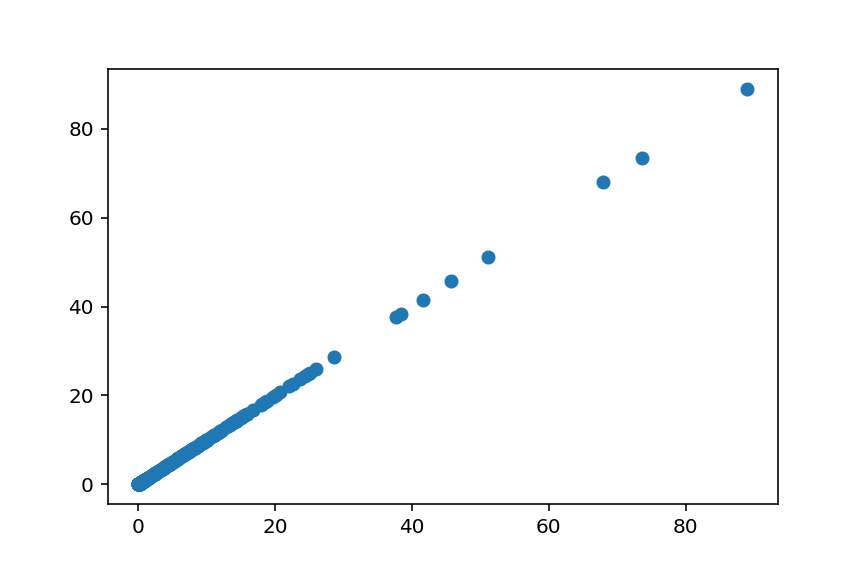

In [38]:
dashboard = pn.Row(
    pn.Column('Test panel dashboard', select1, select2),
    plot
)

dashboard.servable()